In [28]:
%matplotlib inline
from pathlib import Path

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics
import seaborn as sns

import searchnets
from searchnets.datasets import VOCDetection
from searchnets.utils.transforms import VOCTransform

In [ ]:
../../../data/

In [32]:
DATA_ROOT = Path('../../../data')
vsd_results_alexnet = DATA_ROOT.joinpath('csv/VSD_alexnet_transfer_lr_1e-03_no_finetune_test.csv')
vsd_results_CORnet_Z = DATA_ROOT.joinpath('csv/VSD_CORnet_Z_transfer_lr_1e-03_no_finetune_test.csv')

In [26]:
vsd_df_alexnet = pd.read_csv(vsd_results_alexnet)

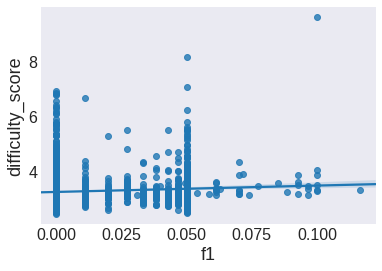

In [36]:
sns.regplot(y="difficulty_score", x="f1", data=vsd_df_alexnet);

In [33]:
vsd_df_alexnet = pd.read_csv(vsd_results_CORnet_Z)

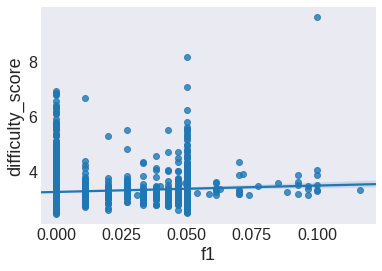

In [35]:
sns.regplot(y="difficulty_score", x="f1", data=vsd_df_alexnet);